# INPEDownloader
## WRF Forecasts

The INPERainDownloader package also allows us to pull forecasts provided by the WRF model, with a maximum of 7 days in advance. <br>
One basic difference from the forecasts to the actual measurements or climatology is that we need to specify the reference date. 

For example, if we want to get the forecast for 2023-05-12, we need to pass what is the day that this forecast was created. As we have a 7-day forecast, we could use 2023-05-11 (1-day forecast), or 2023-05-05 (7-day forecast).

In [21]:
%load_ext autoreload
%autoreload 2

import geopandas as gpd

from mergedownloader.downloader import Downloader
from mergedownloader.inpeparser import INPEParsers, INPETypes
from mergedownloader.utils import GISUtil

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
download_folder = '/workspaces/reports_folder/downloads/'

In [16]:
downloader = Downloader(
    server=INPEParsers.FTPurl, 
    parsers=INPEParsers.parsers, 
    local_folder=download_folder
)

In [17]:
brazil = gpd.read_file('../data/states/')

<Axes: >

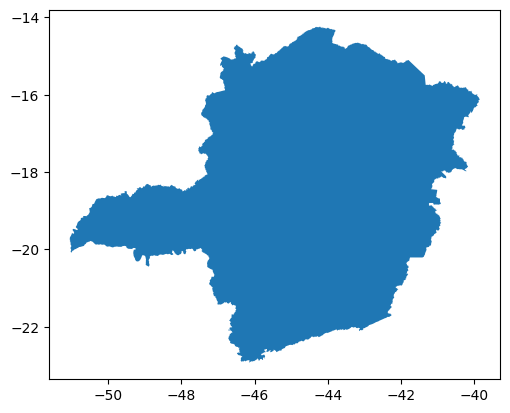

In [18]:
mg = brazil.query("SIGLA_UF == 'MG'")
mg.plot()

## Downloading forcast for a single day

For example, suppose we are in the 1st of June 2023, and we want the forecast for 7 days ahead. We can open this file like so:

In [20]:
forecast = downloader.open_file('20230607', datatype=INPETypes.DAILY_WRF, ref_date='20230602')
forecast

<xarray.DataArray 'forecast' (time: 1, latitude: 957, longitude: 797)>
[762729 values with dtype=float32]
Coordinates:
    surface      float64 ...
  * latitude     (latitude) float64 -54.96 -54.89 -54.82 ... 11.82 11.89 11.96
  * longitude    (longitude) float64 -83.74 -83.67 -83.6 ... -28.09 -28.02
  * time         (time) datetime64[ns] 2023-06-07T12:00:00
    spatial_ref  int64 0

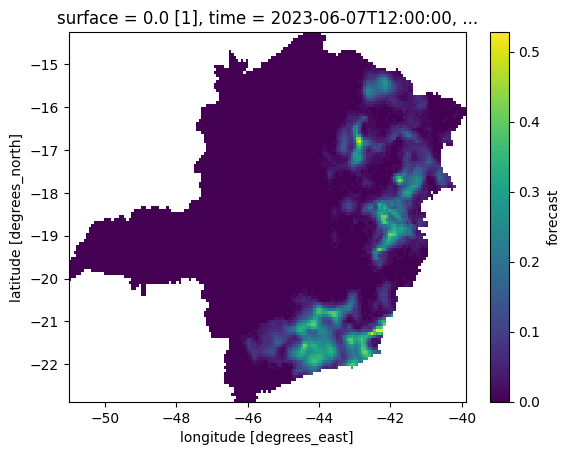

In [22]:
GISUtil.cut_cube_by_geoms(
    forecast,
    mg.geometry
).plot()

## Downloading 7-day forecast

Similarly to creating cube for daliy rain, it's posisble to create a cube with the 7-day forecast. This cube can be accumulated to retrieve the expected rain within the next 7 days, like in the following example. 

In [30]:
# Get the forecasts (7-day) for the reference date 20230601
cube = downloader.create_cube(
    start_date='20230603',
    end_date='20230609',
    datatype=INPETypes.DAILY_WRF,
    ref_date='20230602'
)

In [32]:
accum_forecast = cube.sum(dim='time')

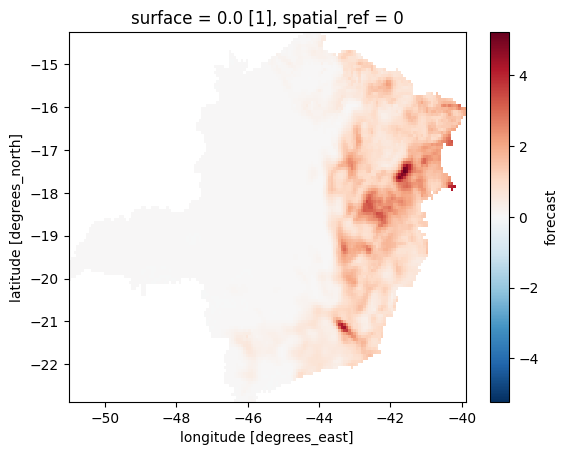

In [33]:
GISUtil.cut_cube_by_geoms(
    accum_forecast,
    mg.geometry
).plot()

## Downloading a forecast

It's also possible to download a forecast cube, but it's necessary to select the forecast lag that we want. For example, if we want to create a cube with the next-day forecasts for a given period, we can use the `create_forecast_cube` and specify `1` as `forecast_lag`. 

In [31]:
forecast_cube = downloader.create_forecast_cube(
    start_date='20230615',
    end_date='20230620',
    forecast_lag=1
)
